In [7]:
import networkx as nx, matplotlib.pyplot as plt, pandas as pd
from karateclub import Diff2Vec, Role2Vec
from sklearn.manifold import TSNE
import numpy as np

In [2]:
G = nx.DiGraph()

In [8]:
df = pd.read_csv('../data/ethereum_erc20.csv')
print(len(df))
df = df[df['from']!='0x0000000000000000000000000000000000000000']
print(len(df))
df = df.head(1000)
df
#token_transfers = df[['from', 'to']].values.tolist()

# for transfer in token_transfers:
#     from_account, to_account = transfer
#     G.add_edge(from_account, to_account)

3310393
3071016


,timeStamp,hash,from,to,contractAddress,value,nonce,tokenName,tokenDecimal,gasPrice,gasUsed,chainName,tokenType
1,1653488958,0xa44791bb49c158134b48288c6eee797b8dba2661c2f7...,0x000000085d9a759bb5c3d459d638739c0f48deb0,0x3b9013a5a62b355ca6e3f6dffcbeaf28ecf1f784,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,30000000000000000,165,Wrapped Ether,18.0,32603952695,207175,Ethereum,20
2,1657777314,0xa140c52f1b6cc8d7b0c5ab7af2438d97e84cf752b534...,0xeb5c52e8af57334fab0b5f3d888990c108545527,0x000000085d9a759bb5c3d459d638739c0f48deb0,0xd5d86fc8d5c0ea1ac1ac5dfab6e529c9967a45e9,500000000000000000000,166,NFT Worlds,18.0,12449848873,144176,Ethereum,20
3,1657777477,0xfcd068e34b7b67a2ebdbb46736ccd1b8da2a23a8f1fc...,0x000000085d9a759bb5c3d459d638739c0f48deb0,0xb6c506ea7dc8177155e5e3b44b8e7357d814084d,0xd5d86fc8d5c0ea1ac1ac5dfab6e529c9967a45e9,500000000000000000000,168,NFT Worlds,18.0,11456795370,333492,Ethereum,20
4,1658650896,0xaa73d52ef0f261368b27f66f66626f1f6acfa7eaf573...,0xf5e38bbedc78efea055e0c56035adb320e64c4bc,0x000000085d9a759bb5c3d459d638739c0f48deb0,0xd88e87cd53d5b3c88c07bdb4715a39b75d6e7870,333,444,$ SolFi.Vision,0.0,8599242555,486321,Ethereum,20
5,1661826260,0x1c736a05338766f550af7f5a01d69320409174e6a726...,0xa4108aa1ec4967f8b52220a4f7e94a8201f2d906,0x000000085d9a759bb5c3d459d638739c0f48deb0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1670000000,676,USD Coin,6.0,17022533632,585731,Ethereum,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1624444294,0xee171d3aacd8cdd3d2be1553e26024c160adf2c3219a...,0x0e20642b32567f2dc74f149663fc474f534e1d5a,0x0013aa2fb5ec916660b38f1d53d4fc9bf8ef8a84,0x4efe8665e564bf454ccf5c90ee16817f7485d5cf,250000000000000000000,540,BlackDragon Token,18.0,10000000000,194262,Ethereum,20
1045,1624604039,0x044dc1d4c5aa54f42f79382b960ce371cb31d5cb1854...,0x182b723a58739a9c974cfdb385ceadb237453c28,0x0013aa2fb5ec916660b38f1d53d4fc9bf8ef8a84,0x5a98fcbea516cf06857215779fd812ca3bef1b32,133431344321104426581,541,Lido DAO Token,18.0,6000000000,262100,Ethereum,20
1047,1624612038,0xaab8bf3d4972e671c033e494c35f7eb883d9464c34fa...,0x8ebc56a13ae7e3ce27b960b16aa57efed3f4e79e,0x0013aa2fb5ec916660b38f1d53d4fc9bf8ef8a84,0x38e4adb44ef08f22f5b5b76a8f0c2d0dcbe7dca1,54924087579125213501,543,Concentrated Voting Power,18.0,19000000000,136619,Ethereum,20
1048,1624708267,0x1ca1db15399d31be87e8fc4b0b0af18d2949f4ddeed9...,0xd152f549545093347a162dce210e7293f1452150,0x0013aa2fb5ec916660b38f1d53d4fc9bf8ef8a84,0xf4b5470523ccd314c6b9da041076e7d79e0df267,6084000000000000000000,4,BlockBank,18.0,10000000000,3268418,Ethereum,20


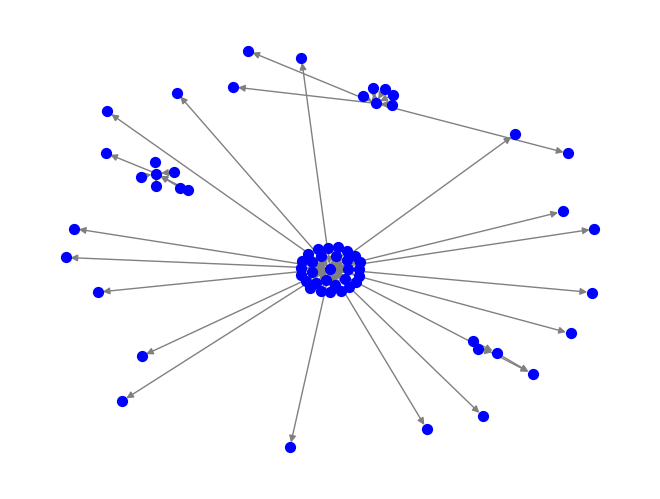

In [9]:
# nx.draw(G,
#         with_labels=False,
#         node_color="blue",
#         node_size=50,
#         edge_color="gray",
#         arrows= True)

In [ ]:
# Create an integer index for the 'from' and 'to' columns
addresses = pd.concat([df['from'], df['to']]).unique()
address_to_int = {address: i for i, address in enumerate(addresses)}

# Replace addresses with integer indices in 'from' and 'to' columns
df_transfers = df[['from', 'to']].replace(address_to_int)

# Create a directed graph from the dataframe
G = nx.from_pandas_edgelist(df_transfers, 'from', 'to', create_using=nx.DiGraph())

# Initialize Diff2Vec model
diff2vec = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=64)
diff2vec.fit(G)

# Get the embeddings
diff_embeddings = diff2vec.get_embedding()

# Initialize Role2Vec model
role2vec = Role2Vec(walk_number=10, walk_length=80, dimensions=64, workers=4)
role2vec.fit(G)

# Get the embeddings
role_embeddings = role2vec.get_embedding()

combined_embeddings = np.concatenate((diff_embeddings, role_embeddings), axis=1)

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2)
combined_embeddings_2d = tsne.fit_transform(combined_embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(combined_embeddings_2d[:, 0], combined_embeddings_2d[:, 1])
plt.title('2D t-SNE of Combined Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()